Text Mining

A sample text snippet from an article on web regarding India's Economic Growth and Challenges




In [ ]:

Article= '''India has been one of the fastest-growing major economies in the world, with significant advancements in various sectors such as technology, manufacturing, and services. The country's gross domestic product (GDP) growth rate averaged around 7% annually over the past decade, driven by domestic consumption and investment. However, India faces several challenges, including income inequality, infrastructure deficits, and regulatory hurdles that need to be addressed to sustain long-term growth.

Despite these challenges, India's demographic dividend, with a large and young population, presents immense potential for economic expansion. The government's initiatives like "Make in India" and "Digital India" aim to attract investment, boost manufacturing, and digitize the economy, further positioning India as a global economic powerhouse.
'''

Cleaning the text data

In [ ]:
# Cleaning the text data to remove all punctuations, numbers and special characters
import re

# removing all the special characters
# Just a template to show how it can be done Selectively
cleanedArticle = re.sub(r'[?|$|.|!]',r' ',Article)

# removing everything which is not Alphabets
cleanedArticle = re.sub(r'[^a-z A-Z]',r' ',cleanedArticle)

# Converting the whole text to lowercase
cleanedArticle = cleanedArticle.lower()

# Deleting any word which is less than 3-characters mostly those are stopwords
cleanedArticle= re.sub(r'\b\w{1,3}\b', ' ', cleanedArticle)

# Stripping extra spaces in the text
cleanedArticle= re.sub(r' +', ' ', cleanedArticle)

cleanedArticle

'india been fastest growing major economies world with significant advancements various sectors such technology manufacturing services country gross domestic product growth rate averaged around annually over past decade driven domestic consumption investment however india faces several challenges including income inequality infrastructure deficits regulatory hurdles that need addressed sustain long term growth despite these challenges india demographic dividend with large young population presents immense potential economic expansion government initiatives like make india digital india attract investment boost manufacturing digitize economy further positioning india global economic powerhouse '

Importing the libraries

In [ ]:
# Finding out the frequency of words in text
import pandas as pd

# Splitting the text to make list of words
WordList=cleanedArticle.split()

# Creating a Dataframe
WordData=pd.DataFrame(data= pd.Series(WordList), columns=['words'])

# Finding the top frequency words
WordData.groupby('words').size().nlargest(10)

,0
words,
india,6
challenges,2
domestic,2
economic,2
growth,2
investment,2
manufacturing,2
with,2
addressed,1


Installing the workcloud library

In [ ]:

!pip install wordcloud

In [ ]:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from wordcloud import WordCloud, STOPWORDS

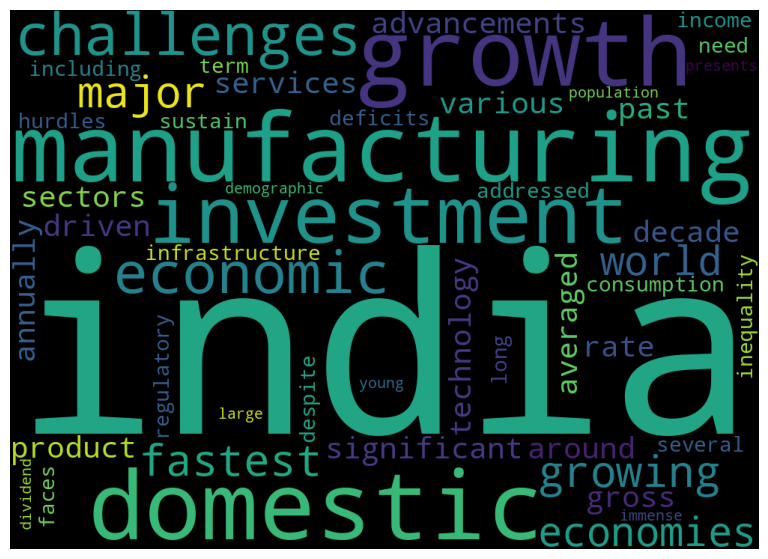

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['less','trump','american','politics','country']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=1000,
                            height=720
                          ).generate(cleanedArticle)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

Bigram/Trigram Wordcloud

In [ ]:

import nltk
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Textblob library installation

##### Important word combinations ####
india major_economies significant_advancements various_sectors country_'s gross_domestic_product gdp growth_rate past_decade domestic_consumption india income_inequality infrastructure_deficits regulatory_hurdles sustain_long-term_growth india 's_demographic_dividend young_population immense_potential economic_expansion government_'s_initiatives india digital_india india global_economic_powerhouse


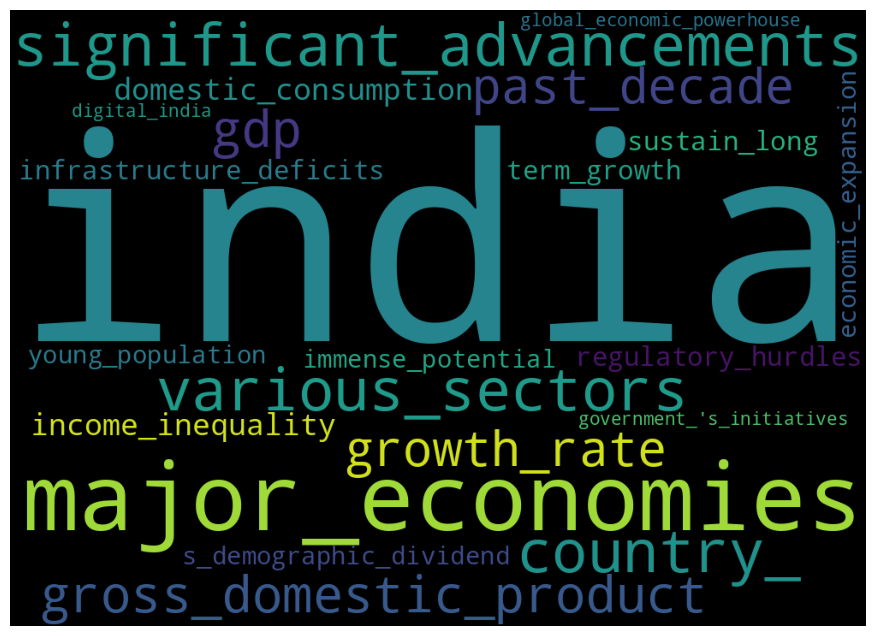

In [ ]:


# A sample text snippet from an artile on web regarding Donald Trump
Article= '''India has been one of the fastest-growing major economies in the world, with significant advancements in various sectors such as technology, manufacturing, and services. The country's gross domestic product (GDP) growth rate averaged around 7% annually over the past decade, driven by domestic consumption and investment. However, India faces several challenges, including income inequality, infrastructure deficits, and regulatory hurdles that need to be addressed to sustain long-term growth.

Despite these challenges, India's demographic dividend, with a large and young population, presents immense potential for economic expansion. The government's initiatives like "Make in India" and "Digital India" aim to attract investment, boost manufacturing, and digitize the economy, further positioning India as a global economic powerhouse.

'''

########################################################################
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(Article)

# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))

# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
print('##### Important word combinations ####')
print(NewNounString)

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['less','Trump','American','politics','country']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()